In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import xarray as xr
import hsmm_mvpy as hmp
from pathlib import Path
from mne.io import read_info
from hmpai.data import StageFinder, SAT1_STAGES_ACCURACY, SAT1_STAGES_SPEED, SAT2_STAGES_ACCURACY, SAT2_STAGES_SPEED, AR_STAGES
from hmpai.ica import ICA

In [2]:
# info_path = Path("../data/sat2/preprocessed_500hz/preprocessed_S1_raw.fif")
info_path = Path("../data/sat1/preprocessed/processed_0001_epo.fif")
positions = read_info(info_path)

(1, 2445, 30, 1243)
S10
<xarray.Dataset>
Dimensions:      (epochs: 2445, channels: 30, samples: 1243, participant: 1)
Coordinates:
  * epochs       (epochs) int64 0 1 2 3 4 5 6 ... 2441 2442 2443 2444 2445 2446
  * channels     (channels) object 'Fp1' 'Fp2' 'AFz' 'F7' ... 'CPz' 'CP2' 'CP6'
  * samples      (samples) int64 0 1 2 3 4 5 6 ... 1237 1238 1239 1240 1241 1242
  * participant  (participant) object 'S10'
    event_name   (participant, epochs) object 'low/accuracy/right/3' ... 'hig...
    rt           (participant, epochs) float64 0.7334 0.5977 ... 0.4463 0.418
Data variables:
    data         (participant, epochs, channels, samples) float64 1.244e-05 ....
Attributes:
    sfreq:           512.0
    offset:          0
    lowpass:         100.0
    highpass:        1.0
    lower_limit_RT:  0.25
    upper_limit_RT:  2.5
Transforming epoched data to principal component (PC) space


/mnt/c/git/hmp/src/hsmm_mvpy/utils.py:638: UserWarning: Requested standardization of between participant variance yet no participant dimension is found in the data or only one participant is present. No standardization is done, set apply_standard to False to avoid this warning.
  warn('Requested standardization of between participant variance yet no participant dimension is found in the data or only one participant is present. No standardization is done, set apply_standard to False to avoid this warning.')


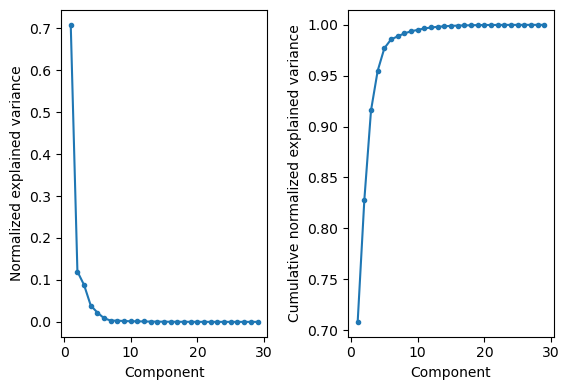

Fitting HMP model for accuracy condition
Estimating 4 events model with 100 starting point(s)


  0%|          | 0/100 [00:00<?, ?it/s]

parameters estimated for 4 events model
Fitting HMP model for speed condition
Estimating 3 events model with 100 starting point(s)


  0%|          | 0/100 [00:00<?, ?it/s]

parameters estimated for 3 events model


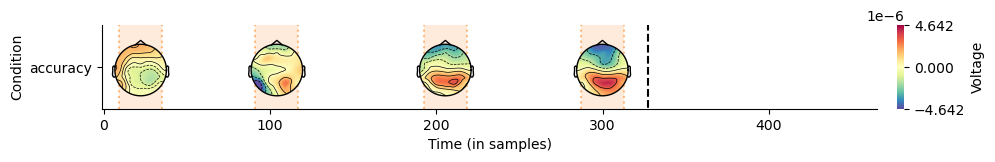

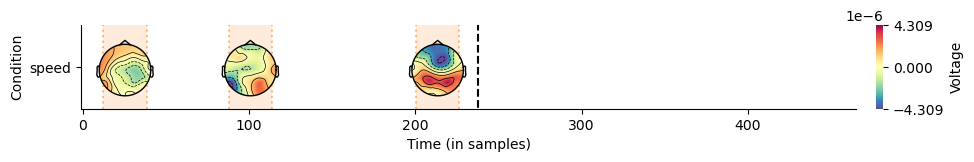

Labeling dataset for accuracy condition
Processing participant S10
Labeling dataset for speed condition
Processing participant S10
(1, 2445, 30, 1243)
S11
<xarray.Dataset>
Dimensions:      (epochs: 2445, channels: 30, samples: 1243, participant: 1)
Coordinates:
  * epochs       (epochs) int64 0 1 2 3 4 5 6 ... 2441 2442 2443 2444 2445 2446
  * channels     (channels) object 'Fp1' 'Fp2' 'AFz' 'F7' ... 'CPz' 'CP2' 'CP6'
  * samples      (samples) int64 0 1 2 3 4 5 6 ... 1237 1238 1239 1240 1241 1242
  * participant  (participant) object 'S11'
    event_name   (participant, epochs) object 'high/speed/right/2' ... 'low/a...
    rt           (participant, epochs) float64 0.8047 0.7129 ... 0.4814 1.188
Data variables:
    data         (participant, epochs, channels, samples) float64 -1.723e-06 ...
Attributes:
    sfreq:           512.0
    offset:          0
    lowpass:         100.0
    highpass:        1.0
    lower_limit_RT:  0.25
    upper_limit_RT:  2.5
Transforming epoched data to pri

/mnt/c/git/hmp/src/hsmm_mvpy/utils.py:638: UserWarning: Requested standardization of between participant variance yet no participant dimension is found in the data or only one participant is present. No standardization is done, set apply_standard to False to avoid this warning.
  warn('Requested standardization of between participant variance yet no participant dimension is found in the data or only one participant is present. No standardization is done, set apply_standard to False to avoid this warning.')


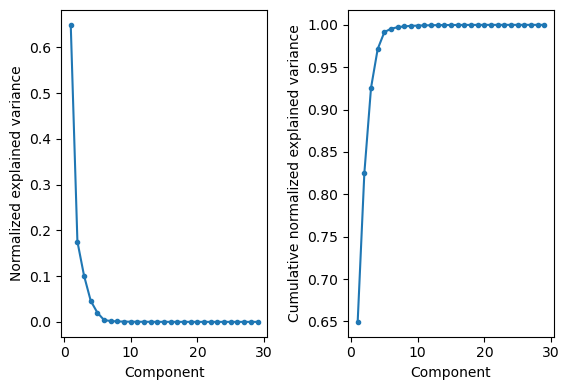

Fitting HMP model for accuracy condition
Estimating 4 events model with 100 starting point(s)


  0%|          | 0/100 [00:00<?, ?it/s]

parameters estimated for 4 events model
Fitting HMP model for speed condition
Estimating 3 events model with 100 starting point(s)


  0%|          | 0/100 [00:00<?, ?it/s]

parameters estimated for 3 events model


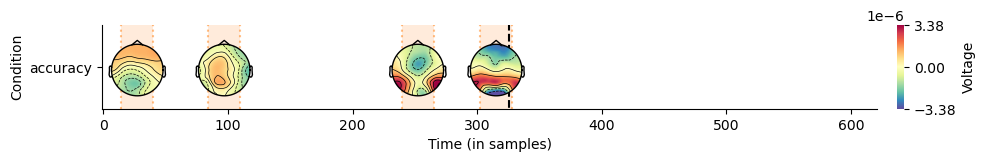

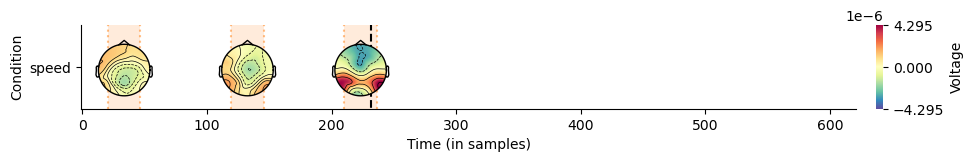

Labeling dataset for accuracy condition
Processing participant S11
Labeling dataset for speed condition
Processing participant S11
(1, 2445, 30, 1243)
S12
<xarray.Dataset>
Dimensions:      (epochs: 2445, channels: 30, samples: 1243, participant: 1)
Coordinates:
  * epochs       (epochs) int64 0 1 2 3 4 5 6 ... 2441 2442 2443 2444 2445 2446
  * channels     (channels) object 'Fp1' 'Fp2' 'AFz' 'F7' ... 'CPz' 'CP2' 'CP6'
  * samples      (samples) int64 0 1 2 3 4 5 6 ... 1237 1238 1239 1240 1241 1242
  * participant  (participant) object 'S12'
    event_name   (participant, epochs) object 'high/accuracy/left/1' ... 'low...
    rt           (participant, epochs) float64 0.7021 0.9287 ... 0.542 0.4473
Data variables:
    data         (participant, epochs, channels, samples) float64 4.458e-06 ....
Attributes:
    sfreq:           512.0
    offset:          0
    lowpass:         100.0
    highpass:        1.0
    lower_limit_RT:  0.25
    upper_limit_RT:  2.5
Transforming epoched data to pri

/mnt/c/git/hmp/src/hsmm_mvpy/utils.py:638: UserWarning: Requested standardization of between participant variance yet no participant dimension is found in the data or only one participant is present. No standardization is done, set apply_standard to False to avoid this warning.
  warn('Requested standardization of between participant variance yet no participant dimension is found in the data or only one participant is present. No standardization is done, set apply_standard to False to avoid this warning.')


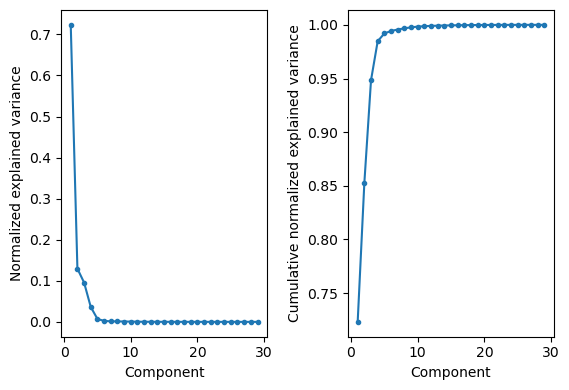

Fitting HMP model for accuracy condition
Estimating 4 events model with 100 starting point(s)


  0%|          | 0/100 [00:00<?, ?it/s]

parameters estimated for 4 events model
Fitting HMP model for speed condition
Estimating 3 events model with 100 starting point(s)


  0%|          | 0/100 [00:00<?, ?it/s]

parameters estimated for 3 events model


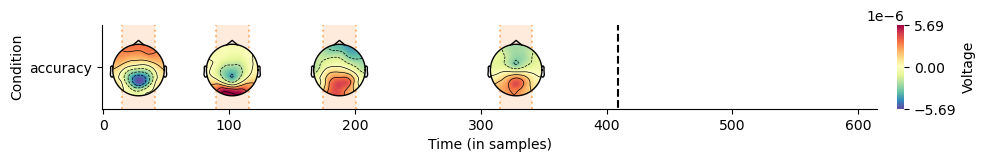

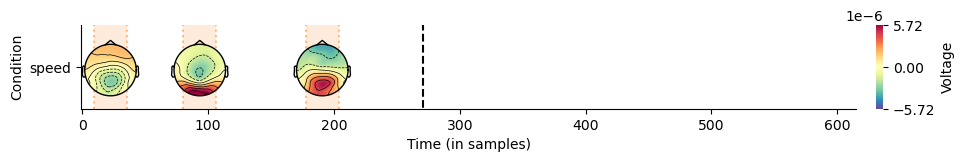

Labeling dataset for accuracy condition
Processing participant S12
Labeling dataset for speed condition
Processing participant S12
(1, 2445, 30, 1243)
S13
<xarray.Dataset>
Dimensions:      (epochs: 2445, channels: 30, samples: 1243, participant: 1)
Coordinates:
  * epochs       (epochs) int64 0 1 2 3 4 5 6 ... 2441 2442 2443 2444 2445 2446
  * channels     (channels) object 'Fp1' 'Fp2' 'AFz' 'F7' ... 'CPz' 'CP2' 'CP6'
  * samples      (samples) int64 0 1 2 3 4 5 6 ... 1237 1238 1239 1240 1241 1242
  * participant  (participant) object 'S13'
    event_name   (participant, epochs) object 'low/speed/left/2' ... 'high/ac...
    rt           (participant, epochs) float64 0.4961 0.3584 ... 0.6572 0.6758
Data variables:
    data         (participant, epochs, channels, samples) float64 -9.186e-07 ...
Attributes:
    sfreq:           512.0
    offset:          0
    lowpass:         100.0
    highpass:        1.0
    lower_limit_RT:  0.25
    upper_limit_RT:  2.5
Transforming epoched data to pr

/mnt/c/git/hmp/src/hsmm_mvpy/utils.py:638: UserWarning: Requested standardization of between participant variance yet no participant dimension is found in the data or only one participant is present. No standardization is done, set apply_standard to False to avoid this warning.
  warn('Requested standardization of between participant variance yet no participant dimension is found in the data or only one participant is present. No standardization is done, set apply_standard to False to avoid this warning.')


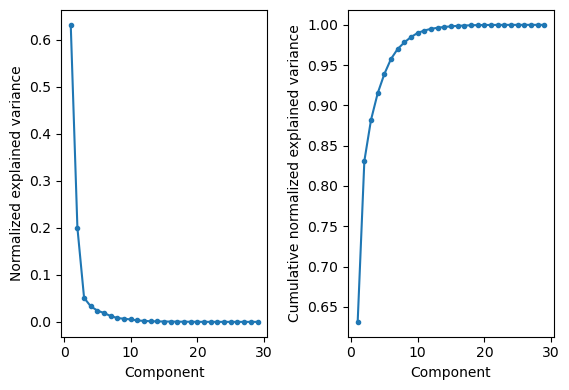

ValueError: invalid literal for int() with base 10: ''

In [3]:
epoched_data_paths = [
    Path("../data/sat2/data_part1.nc"),
    Path("../data/sat2/data_part2.nc"),
]
conditions = ["accuracy", "speed"]
labels = {"accuracy": SAT1_STAGES_ACCURACY, "speed": SAT1_STAGES_SPEED}

cpus = 16

for epoched_data_path in epoched_data_paths:
    epoched_data = xr.load_dataset(epoched_data_path)
    for participant in epoched_data.participant.values:
        epoched_data_participant = epoched_data.sel(participant=[participant])
        print(epoched_data_participant.data.shape)
        print(participant)
        print(epoched_data_participant)
        stage_finder = StageFinder(
            epoched_data_participant,
            labels,
            conditions=conditions,
            cpus=cpus,
            fit_function="fit_single",
            fit_args={"starting_points": 100, "tolerance": 1e-5},
            verbose=False,
            condition_variable="event_name",
            condition_method="contains",
        )
        stage_finder.fit_model()
        stage_finder.visualize_model(positions)
        input("Enter to continue (if model is correct), esc to cancel")
        stage_data = stage_finder.label_model()
        stage_data.to_netcdf(Path("../data/sat2") / (f"stage_data_{participant}.nc"))

Transforming epoched data to principal component (PC) space


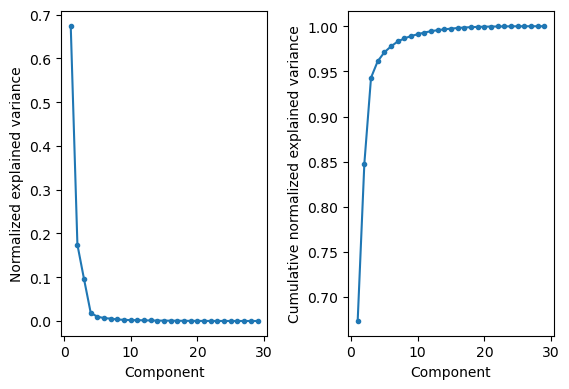

Fitting HMP model for accuracy condition
Estimating 4 events model with 100 starting point(s)


  0%|          | 0/100 [00:00<?, ?it/s]

parameters estimated for 4 events model
Fitting HMP model for speed condition
Estimating 3 events model with 100 starting point(s)


  0%|          | 0/100 [00:00<?, ?it/s]

parameters estimated for 3 events model


In [3]:
cpus = 4

epoched_data_path = Path("../data/sat2/data_part1.nc")
output_path = Path("../data/sat2/stage_data_part1.nc")

conditions = ["accuracy", "speed"]
labels = {"accuracy": SAT1_STAGES_ACCURACY, "speed": SAT1_STAGES_SPEED}

stage_finder = StageFinder(
    epoched_data_path,
    labels,
    conditions=conditions,
    cpus=cpus,
    duration=0,
    fit_function="fit_single",  # n_events is extracted from the amount of labels in 'conditions' variable
    fit_args={"starting_points": 100},
    verbose=False,
    condition_variable="event_name",
    condition_method="contains",
)
stage_finder.fit_model()

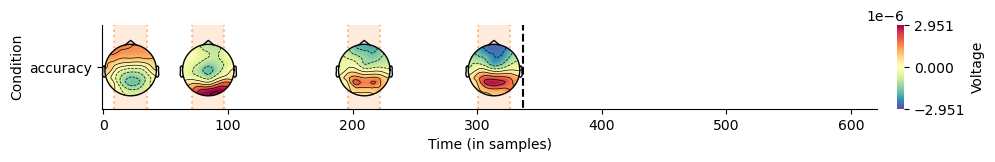

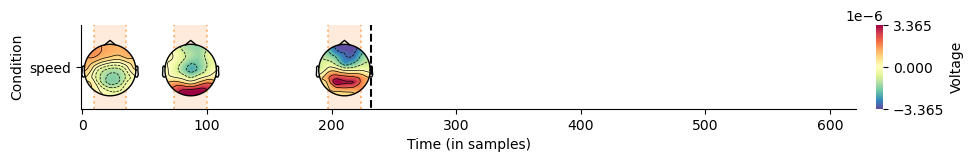

In [4]:
# Visualize model to check if fitting was done as expected

stage_finder.visualize_model(positions)

In [5]:
# Add labels to dataset
stage_data = stage_finder.label_model()

Labeling dataset for accuracy condition
Processing participant S10
Processing participant S11


IndexError: index 2445 is out of bounds for axis 1 with size 2445

In [6]:
# Save labelled dataset
output_path = Path("../data/sat2/stage_data_part1.nc")
stage_data.to_netcdf(output_path)

In [7]:
# Save models
hmp.utils.save_fit(stage_finder.fits[0], "../models/100hz_accuracy_sat2.nc")
hmp.utils.save_fit(stage_finder.fits[1], "../models/100hz_speed_sat2.nc")

../models/100hz_accuracy_sat2.nc saved
../models/100hz_speed_sat2.nc saved
